# kNN

Импортируем библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_curve, auc

Загрузка файла в colab:

Чтение csv в dataframe:

In [4]:
df = pd.read_csv("cancer.csv")
df.head()

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Собираем датасет (**X**) и правильный ответ (**y**):

In [5]:
X = df.drop("label", axis = 1).values
y = df["label"].values

#разделяем датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

Обучаем классификатор:

In [6]:
#заводим новый классификатор
knn = KNeighborsClassifier()

#обучаем классификатор на обучающей выборке
knn.fit(X_train, y_train)

#считаем точность классификатора на тестовой выборке
score = knn.score(X_test, y_test)
print("The number of neighbors is ", knn.n_neighbors,"| Accuracy is ", round(score, 4))

The number of neighbors is  5 | Accuracy is  0.9386


Строим ROC_curve:

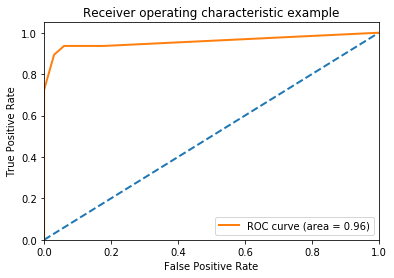

In [8]:
#.predict_proba выдает вероятности классов
y_proba = knn.predict_proba(X_test)

#roc_curve считает false positive rates и true positive rates
#нам нужно определить, вероятности какого класса нас интересуют
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1], pos_label='M')

#считаем auc
roc_auc = auc(fpr, tpr)

#заводим новый график
plt.figure()

#рисуем диагональную линию
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

#наносим roc
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

#определяем ограничения по осям
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#добавляем легенду
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

#выводим графики
plt.show()

Масштабирование датасета:

In [9]:
#заводим новый объект scaler
scaler = RobustScaler()

#обучаем scaler на обучающей выборке и применяем к обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)

#применяем обученный на обучающей выборке scaler к тестовой выборке
X_test_scaled = scaler.transform(X_test)

# Задание: 

Посчитайте accuracy и ROC кривые на двух датасетах (cancer.csv и spam.csv) с и без масштабирования для количества соседей от 1 до 10. Всего должно получится 40 графиков.

The number of neighbors is  1 | Accuracy is  0.9123


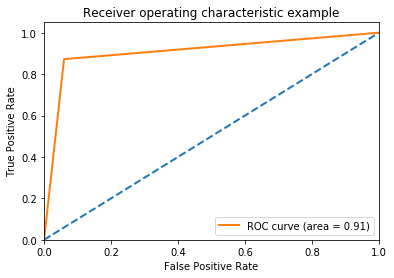

The number of neighbors is  2 | Accuracy is  0.9298


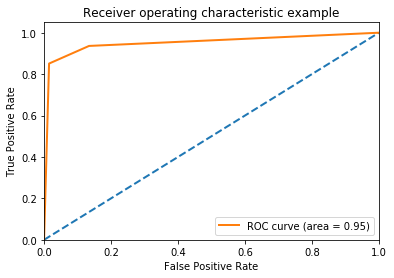

The number of neighbors is  3 | Accuracy is  0.9123


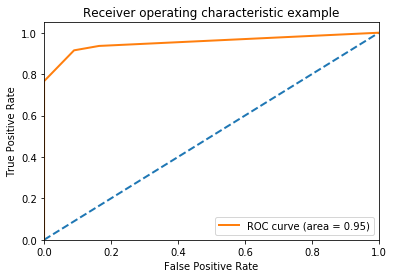

The number of neighbors is  4 | Accuracy is  0.9298


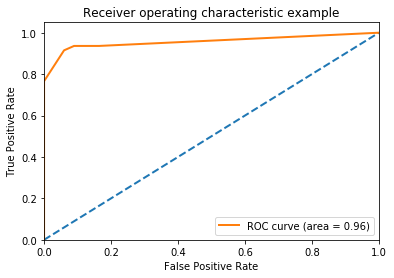

The number of neighbors is  5 | Accuracy is  0.9386


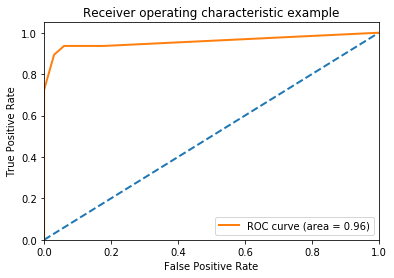

The number of neighbors is  6 | Accuracy is  0.9561


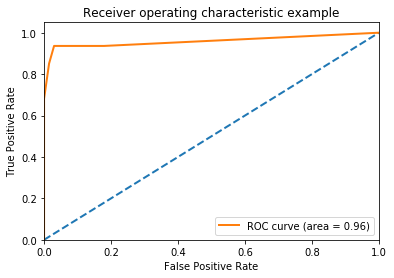

The number of neighbors is  7 | Accuracy is  0.9474


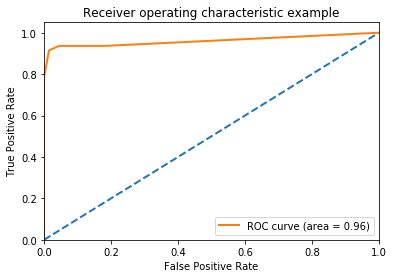

The number of neighbors is  8 | Accuracy is  0.9649


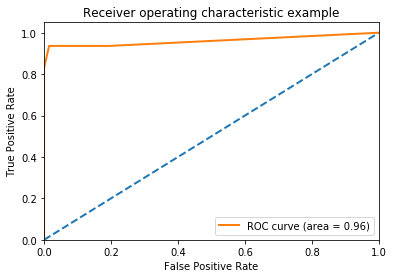

The number of neighbors is  9 | Accuracy is  0.9649


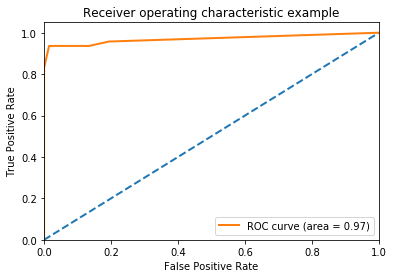

The number of neighbors is  10 | Accuracy is  0.9649


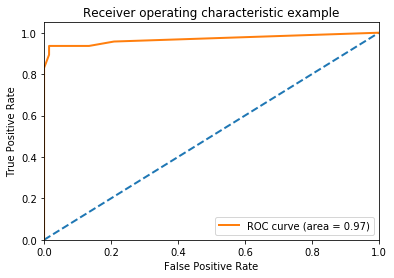

In [13]:
X = df.drop("label", axis = 1).values
y = df["label"].values

#разделяем датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for n_neib in np.arange(1, 11):
    

#заводим новый классификатор
    knn = KNeighborsClassifier(n_neighbors = n_neib)

#обучаем классификатор на обучающей выборке
    knn.fit(X_train, y_train)

#считаем точность классификатора на тестовой выборке
    score = knn.score(X_test, y_test)
    print("The number of neighbors is ", knn.n_neighbors,"| Accuracy is ", round(score, 4))
#.predict_proba выдает вероятности классов
    y_proba = knn.predict_proba(X_test)

#roc_curve считает false positive rates и true positive rates
#нам нужно определить, вероятности какого класса нас интересуют
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1], pos_label='M')

#считаем auc
    roc_auc = auc(fpr, tpr)

#заводим новый график
    plt.figure()

#рисуем диагональную линию
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

#наносим roc
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

#определяем ограничения по осям
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

#добавляем легенду
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

#выводим графики
    plt.show()

The number of neighbors is  1 | Accuracy is  0.9298


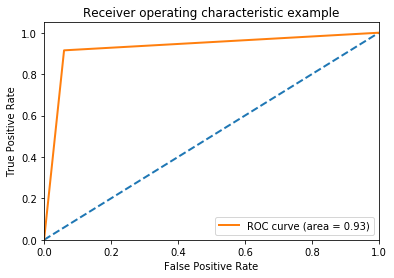

The number of neighbors is  2 | Accuracy is  0.9474


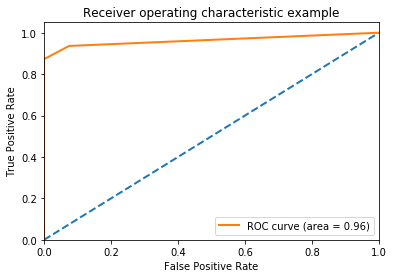

The number of neighbors is  3 | Accuracy is  0.9474


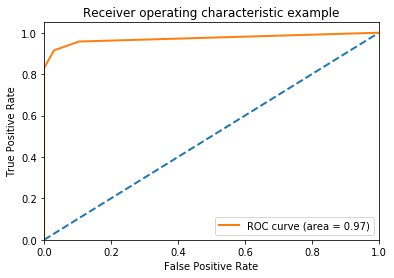

The number of neighbors is  4 | Accuracy is  0.9474


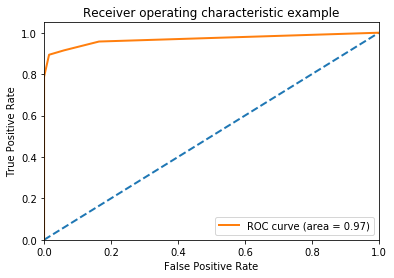

The number of neighbors is  5 | Accuracy is  0.9386


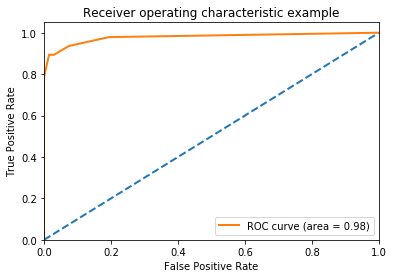

The number of neighbors is  6 | Accuracy is  0.9474


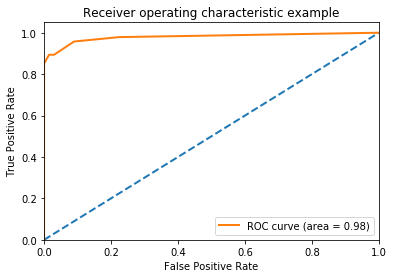

The number of neighbors is  7 | Accuracy is  0.9474


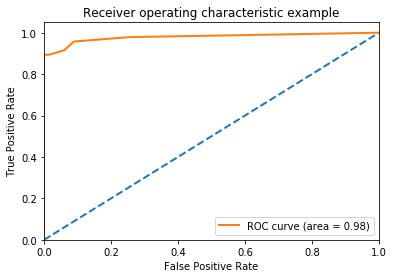

The number of neighbors is  8 | Accuracy is  0.9561


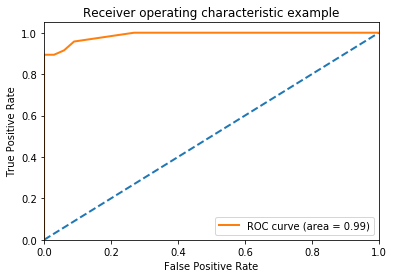

The number of neighbors is  9 | Accuracy is  0.9474


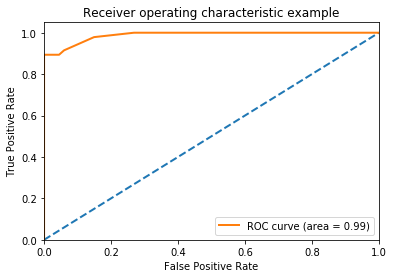

The number of neighbors is  10 | Accuracy is  0.9561


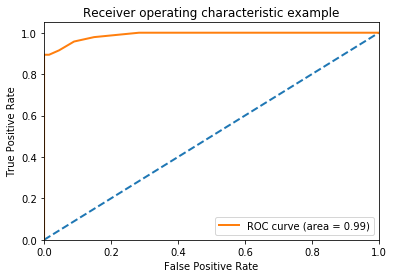

In [14]:
#разделяем датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for n_neib in np.arange(1, 11):
    
#заводим новый классификатор
    knn = KNeighborsClassifier(n_neighbors = n_neib)

#обучаем классификатор на обучающей выборке
    knn.fit(X_train_scaled, y_train)

#считаем точность классификатора на тестовой выборке
    score = knn.score(X_test_scaled, y_test)
    print("The number of neighbors is ", knn.n_neighbors,"| Accuracy is ", round(score, 4))
#.predict_proba выдает вероятности классов
    y_proba = knn.predict_proba(X_test_scaled)

#roc_curve считает false positive rates и true positive rates
#нам нужно определить, вероятности какого класса нас интересуют
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1], pos_label='M')

#считаем auc
    roc_auc = auc(fpr, tpr)

#заводим новый график
    plt.figure()

#рисуем диагональную линию
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

#наносим roc
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

#определяем ограничения по осям
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

#добавляем легенду
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

#выводим графики
    plt.show()

The number of neighbors is  1 | Accuracy is  0.8046


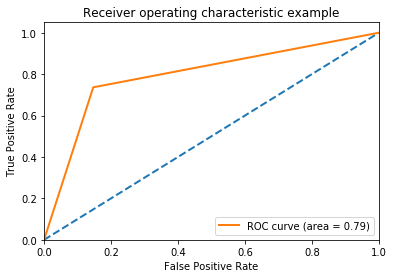

The number of neighbors is  2 | Accuracy is  0.7785


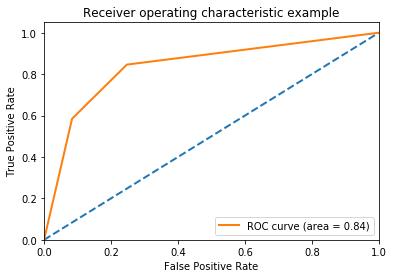

The number of neighbors is  3 | Accuracy is  0.798


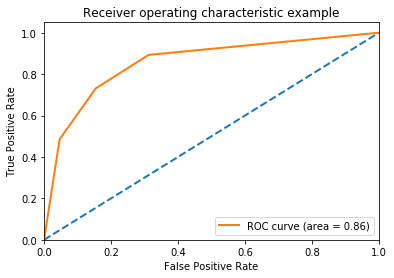

The number of neighbors is  4 | Accuracy is  0.8002


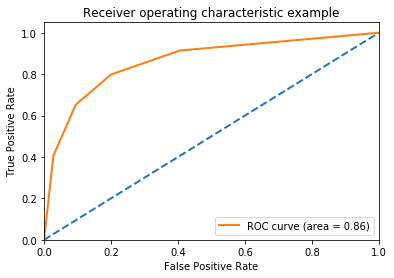

The number of neighbors is  5 | Accuracy is  0.8056


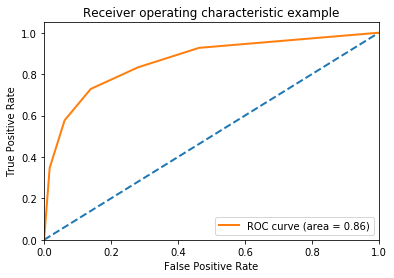

The number of neighbors is  6 | Accuracy is  0.8078


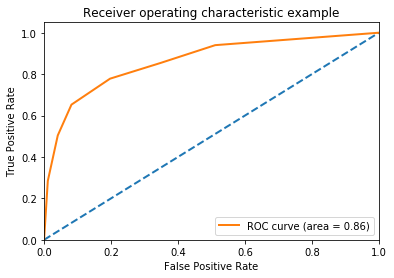

The number of neighbors is  7 | Accuracy is  0.8035


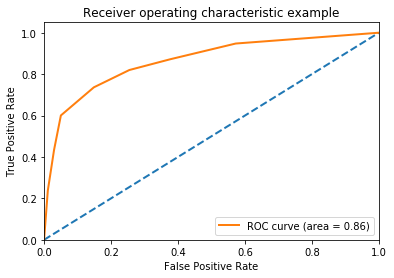

The number of neighbors is  8 | Accuracy is  0.8078


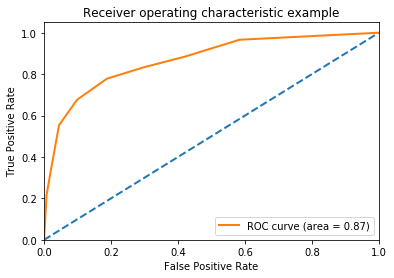

The number of neighbors is  9 | Accuracy is  0.798


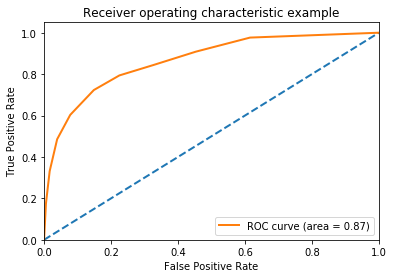

The number of neighbors is  10 | Accuracy is  0.7904


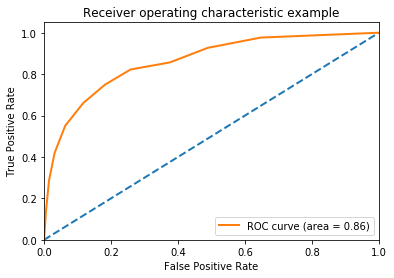

In [16]:
df = pd.read_csv("spam.csv")
X = df.drop("label", axis = 1).values
y = df["label"].values

#разделяем датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for n_neib in np.arange(1, 11):
    
#заводим новый классификатор
    knn = KNeighborsClassifier(n_neighbors = n_neib)

#обучаем классификатор на обучающей выборке
    knn.fit(X_train, y_train)

#считаем точность классификатора на тестовой выборке
    score = knn.score(X_test, y_test)
    print("The number of neighbors is ", knn.n_neighbors,"| Accuracy is ", round(score, 4))
#.predict_proba выдает вероятности классов
    y_proba = knn.predict_proba(X_test)

#roc_curve считает false positive rates и true positive rates
#нам нужно определить, вероятности какого класса нас интересуют
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])

#считаем auc
    roc_auc = auc(fpr, tpr)

#заводим новый график
    plt.figure()

#рисуем диагональную линию
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

#наносим roc
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

#определяем ограничения по осям
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

#добавляем легенду
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

#выводим графики
#заводим новый объект scaler
scaler = RobustScaler()

#обучаем scaler на обучающей выборке и применяем к обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)

#применяем обученный на обучающей выборке scaler к тестовой выборке
X_test_scaled = scaler.transform(X_test)    plt.show()

The number of neighbors is  1 | Accuracy is  0.9066


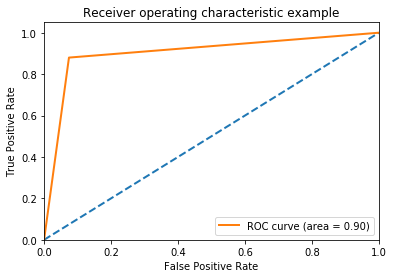

The number of neighbors is  2 | Accuracy is  0.8871


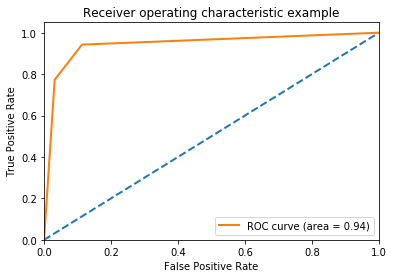

The number of neighbors is  3 | Accuracy is  0.9229


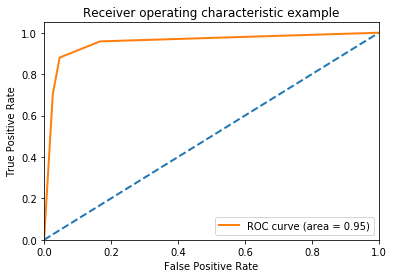

The number of neighbors is  4 | Accuracy is  0.9045


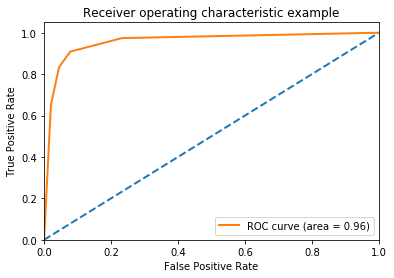

The number of neighbors is  5 | Accuracy is  0.9045


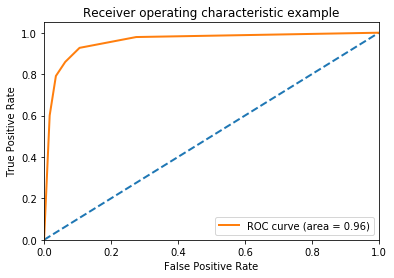

The number of neighbors is  6 | Accuracy is  0.9023


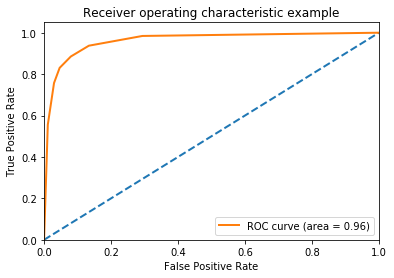

The number of neighbors is  7 | Accuracy is  0.9055


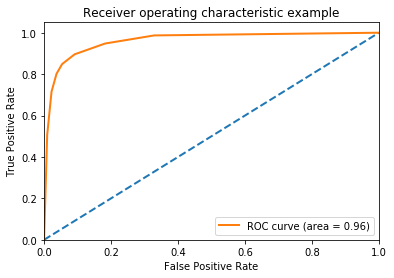

The number of neighbors is  8 | Accuracy is  0.9012


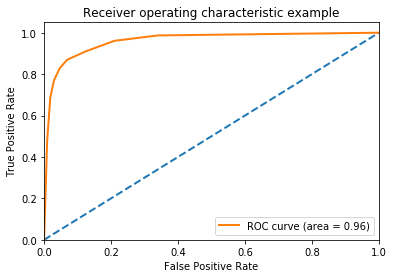

The number of neighbors is  9 | Accuracy is  0.9034


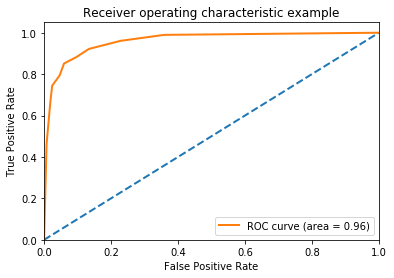

The number of neighbors is  10 | Accuracy is  0.899


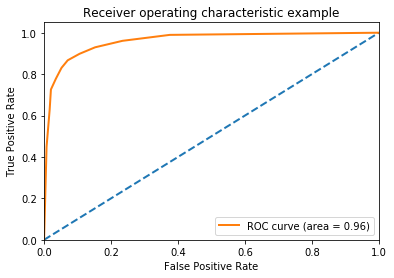

In [18]:

df = pd.read_csv("spam.csv")
X = df.drop("label", axis = 1).values
y = df["label"].values

#разделяем датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#заводим новый объект scaler
scaler = RobustScaler()

#обучаем scaler на обучающей выборке и применяем к обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)

#применяем обученный на обучающей выборке scaler к тестовой выборке
X_test_scaled = scaler.transform(X_test)
for n_neib in np.arange(1, 11):
    
#заводим новый классификатор
    knn = KNeighborsClassifier(n_neighbors = n_neib)

#обучаем классификатор на обучающей выборке
    knn.fit(X_train_scaled, y_train)

#считаем точность классификатора на тестовой выборке
    score = knn.score(X_test_scaled, y_test)
    print("The number of neighbors is ", knn.n_neighbors,"| Accuracy is ", round(score, 4))
#.predict_proba выдает вероятности классов
    y_proba = knn.predict_proba(X_test_scaled)

#roc_curve считает false positive rates и true positive rates
#нам нужно определить, вероятности какого класса нас интересуют
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])

#считаем auc
    roc_auc = auc(fpr, tpr)

#заводим новый график
    plt.figure()

#рисуем диагональную линию
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

#наносим roc
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

#определяем ограничения по осям
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

#добавляем легенду
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

#выводим графики
    plt.show()